In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
sns.set(style='white')

In [205]:
raw_df = pd.read_csv("/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/mushra.csv")

In [206]:
raw_df = df[df['trial_id'] != 'training']
raw_df = df[df['session_uuid'] != '6078451d-adce-43a1-9289-46e0dd3514e1']

In [207]:
df['session_uuid'].value_counts()

b855b983-a931-4629-8617-a915d82251b0    39
13198be2-b8dc-451e-bca1-c1e09bcbcca2    39
90913ed2-88a6-4281-8318-b57a5d240915    33
f9840b36-a298-4e45-b879-75001199a675    33
Name: session_uuid, dtype: int64

In [208]:
# import pandas as pd

# # Assuming your dataframe is called 'df'
# # Filter for rows where the rating_stimulus is either 'anchor' or 'reference'
# filtered_df = df[df['rating_stimulus'].isin(['anchor', 'reference'])]

# # Group the filtered dataframe by uuid and trial_id
# grouped_df = filtered_df.groupby(['session_uuid', 'trial_id'])

# # Check for any cases where the anchor score is greater than the reference score
# result_df = grouped_df.apply(lambda x: x[x['rating_stimulus'] == 'anchor']['rating_score'].max() > x[x['rating_stimulus'] == 'reference']['rating_score'].max())

# # Extract the rows where the value is True and get the uuid and trial_id values
# true_rows = result_df[result_df == True]
# user_trial_list = [(row[0][0], row[0][1]) for row in true_rows.items()]

# # Get the indices of the rows that correspond to the user, trial pairs in user_trial_list
# indices = filtered_df.reset_index().set_index(['session_uuid', 'trial_id']).loc[user_trial_list].index

# print(indices)
# # # Drop the rows with those indices from the original dataframe
# new_df = df.drop(df.reset_index().set_index(['session_uuid', 'trial_id']).loc[indices].index)

# # # Print out the resulting dataframe
# # print(new_df)

In [209]:
def remove_anchor_reference_mix(df):
    # Assuming your dataframe is called df
    # Group the data by 'uuid' and 'trial_id'
    df = df.reset_index()
    grouped = df.groupby(['session_uuid', 'trial_id'])

    # Create an empty list to store the indices of rows that meet the criteria
    indices = []
    num_instances = 0
    names = []

    # Iterate over each group
    for name, group in grouped:
        # Get the ratings for 'anchor' and 'reference' stimuli
        anchor_rating = group[group['rating_stimulus'] == 'anchor']['rating_score'].values
        ref_rating = group[group['rating_stimulus'] == 'reference']['rating_score'].values

        # Check if the anchor rating is higher than the reference rating
        if len(anchor_rating) > 0 and len(ref_rating) > 0 and anchor_rating[0] > ref_rating[0]:
            num_instances += 1
            # If so, add the indices of the rows to the list
            indices.extend(list(group.index))
            names.append(name)
    
    print(f"{num_instances} user, trial pairs removed!")
    return df.drop(indices)

In [210]:
df = remove_anchor_reference_mix(raw_df)

0 user, trial pairs removed!


In [211]:
palette = sns.color_palette(n_colors=4).as_hex()
names = ['end2end', 'style_transfer', 'reference', 'anchor']
colour_map = {name: palette[i] for i, name in enumerate(names)}

format_map = {
    'end2end': 'Our model',
    'anchor': 'Anchor',
    'reference': 'Reference',
    'style_transfer': 'DeepAFx-ST'
}

In [212]:
# def boxplot_effect(df, effect_name):
#     fx = df[df['trial_id'].str.contains(effect_name.lower())]
#     order = fx.groupby(by=["rating_stimulus"])['rating_score'].median().sort_values().index
    
#     my_colours = [colour_map[fx] for fx in order]
#     sns.set_palette(my_colours)
    
#     ax = sns.boxplot(fx, x='rating_stimulus', y='rating_score', order=order)
    
#     ax.set_xlabel("Rating Stimulus")
#     ax.set_ylabel("Rating Score")
#     ax.set_ylim([0,105])
#     ax.yaxis.grid(True)
    
#     labels = [format_map[x] for x in order]
#     ax.set_xticklabels(labels, 
# #                        rotation=20, 
# #                        fontsize=12
#                       )
    
#     ax.set_title(effect_name.title())
#     plt.show()

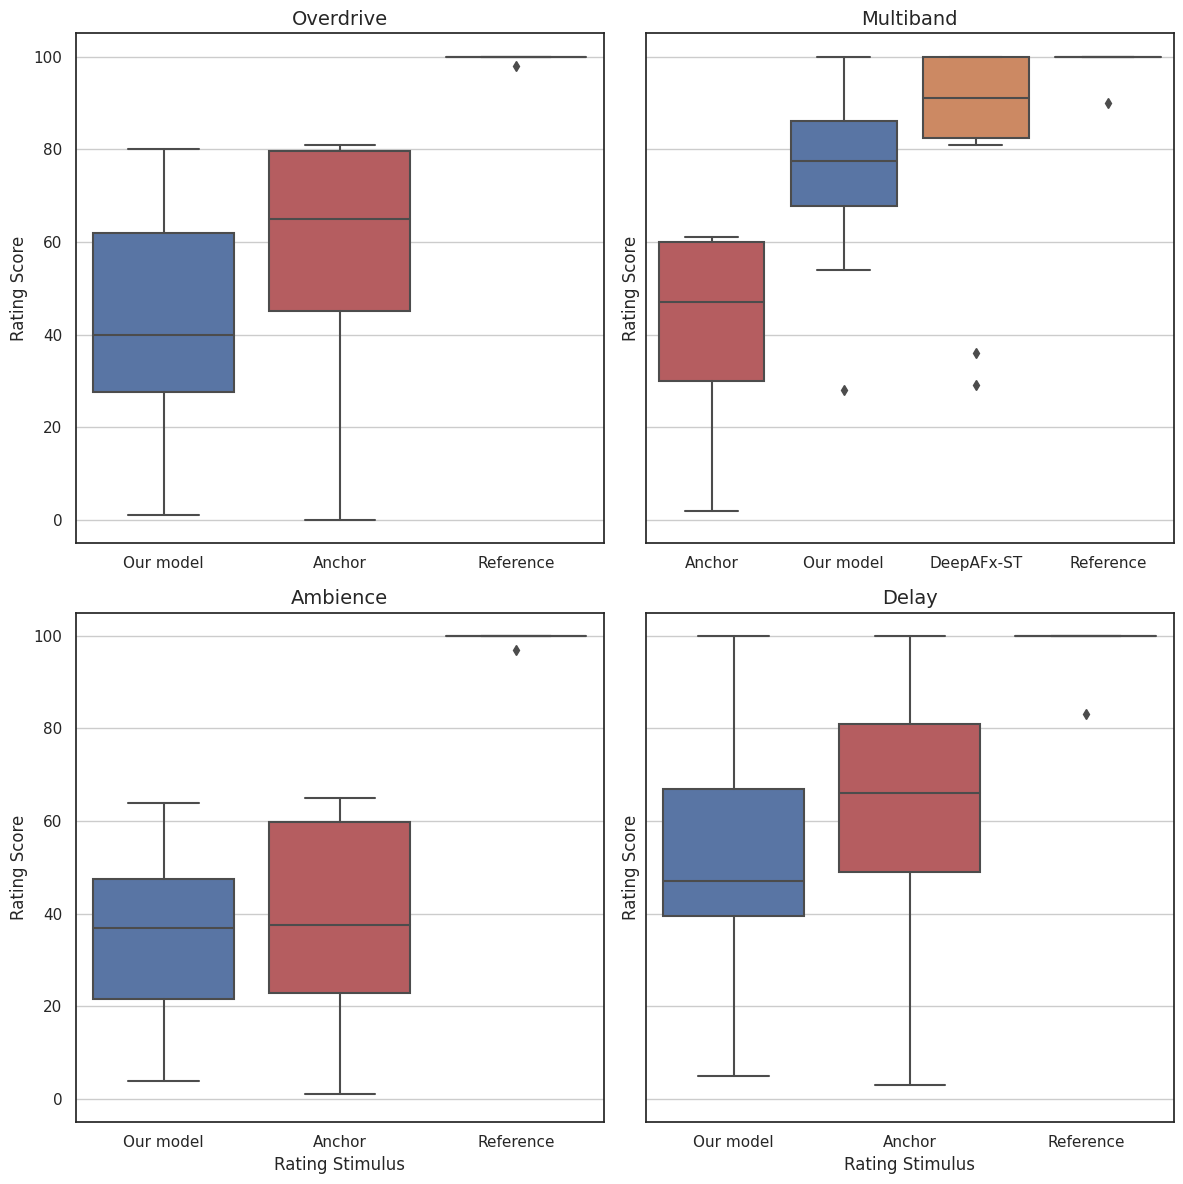

In [213]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharey=True)

effects = ['overdrive', 'multiband', 'ambience', 'delay']

for i, effect_name in enumerate(effects):
    row_idx, col_idx = divmod(i, 2)
    current_ax = ax[row_idx, col_idx]
    
    fx = df[df['trial_id'].str.contains(effect_name.lower())]
    order = fx.groupby(by=["rating_stimulus"])['rating_score'].median().sort_values().index
    
    my_colours = [colour_map[fx] for fx in order]
    sns.set_palette(my_colours)
    
    sns.boxplot(fx, x='rating_stimulus', y='rating_score', order=order, ax=current_ax)
    
    if col_idx == 0:
        current_ax.set_ylabel("Rating Score")
    else:
        current_ax.set_ylabel("Rating Score")
        
    if row_idx == 1:
        current_ax.set_xlabel("Rating Stimulus")
    else:
        current_ax.set_xlabel("")
    
    current_ax.set_ylim([-5,105])
    current_ax.yaxis.grid(True)
    
    labels = [format_map[x] for x in order]
    current_ax.set_xticklabels(labels, 
#                        rotation=20, 
#                        fontsize=12
                      )
    
    current_ax.set_title(effect_name.title(), fontsize=14)

plt.tight_layout()
plt.savefig("/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/mushra/mushra.png")

In [31]:
# boxplot_effect(df, 'overdrive')

In [32]:
# boxplot_effect(df, 'multiband')

In [33]:
# boxplot_effect(df, 'delay')

In [34]:
# boxplot_effect(df, 'ambience')